# **Download Data with StreamStats**

Learn how to use StreamStats python library to download watershed boundary data available in USGS StreamStats API. Watersheds in the United States can be defined using a coordinate reference system (latitude and longitude coordinates). StreamStats provides information including HUC code, a GeoJSON representation of the polygon associated with the watershed, and basin characteristics. 

### Import Packages

Download the necessary Python packages. The``GeoPandas`` package is an open source project that assists in working with geospatial data in Python. Learn more about [GeoPandas](https://geopandas.org/gallery/index.html).

In [1]:
import streamstats
import geopandas as gpd

### Identify watershed

Identify a spatial point using coordinate system (e.g., longitude and latitude cordinates). Assign cordinates to variables ``lat`` and ``lon``. Using StreamStat's data, assign location to a variable that will represent the delineated watershed using the USGS StreamStats API. 

In [2]:
lat, lon = 39.966256, -105.482227
ws = streamstats.Watershed(lat=lat, lon=lon)

### Find the Hyrdologic Unit Code (HUC) of the watershed

The USGS delineates watershed using a series of numbers based a hierarchal region system. Every watershed is assigned a series of numbers called the hydrological unit code (HUC). StreamStats uses HUC to identify and delineate watersheds. The ``ws.huc`` function will return the HUC of the identified watershed.

In [3]:
ws.huc

'10190005'

### Find boundary properties of the watershed

The ``ws.boundary()`` function will return the full watershed GeoJSON as a dictionary. ESPG identifies the coordinate reference system (crs) used to project the watershed. 

In [4]:
ws.boundary
ws.boundary['crs']

{'type': 'ESPG', 'properties': {'code': 4326}}

### Create plot of the watershed

Using geopandas and the coordinate reference system, assign geodataframe to variable and plot data.

<AxesSubplot:>

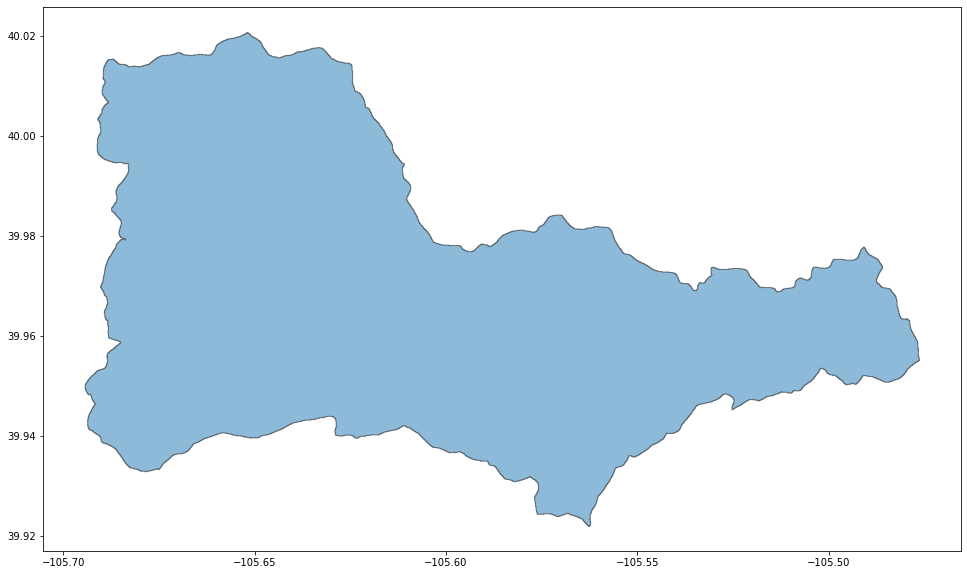

In [5]:
ws.boundary
poly = gpd.GeoDataFrame.from_features(ws.boundary["features"], crs="EPSG:4326")
poly.plot(figsize=(20, 10), alpha=0.5, edgecolor='k', legend=True)

## Display multiple watersheds

StreamStats allows users to plot multiple watersheds on a singular plot. The example below plots the previously defined watershed and an additional watershed on a single plot. Similar to plotting an individual watershed, user must define additional watershed. 

In [6]:
# Assign coordinates to variables
lat, lon = 39.869333, -105.749961
ws2 = streamstats.Watershed(lat=lat, lon=lon)

Assign individual geodataframes to variables, assuring they have the same coordinate reference scale.

In [7]:
# Create geodataframes
poly1 = gpd.GeoDataFrame.from_features(
    ws.boundary["features"], crs="EPSG:4326")
poly2 = gpd.GeoDataFrame.from_features(
    ws2.boundary["features"], crs="EPSG:4326")

Function ``ax`` allows users to plot two variables on the same graph. The ``ax`` function also allows users to customize graph properties. Attribute ``figsize`` adjusts plot size, ``alpha`` allows users to adjust watershed transparency, ``edgecolor`` defines the watershed boundary color ([list of colors](https://matplotlib.org/stable/gallery/color/named_colors.html)). Visit this [tutorial](https://geopandas.org/docs/user_guide/mapping.html) to explore additional options for customizing maps and plots with geopandas. 

<AxesSubplot:>

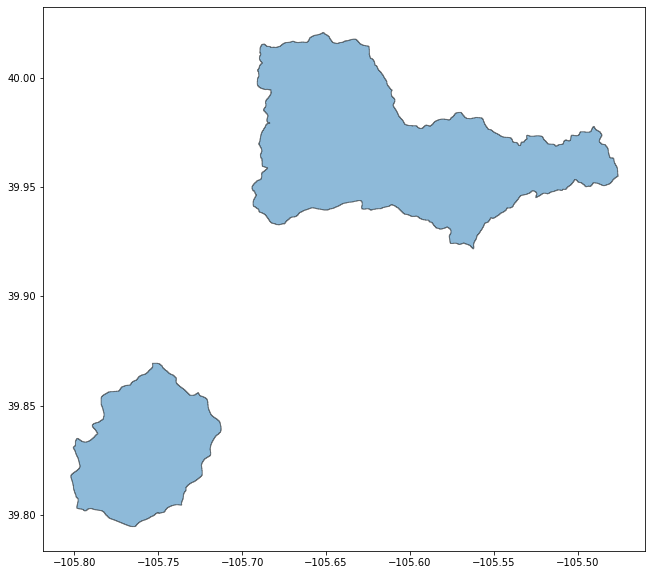

In [8]:
ax = poly1.plot(figsize=(20, 10), alpha=0.5, edgecolor='k', legend=True)
poly2.plot(figsize=(20, 10), alpha=0.5, edgecolor='k', legend=True, ax=ax)